In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv('/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam.csv',encoding=('ISO-8859-1'))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
9516,ham,I got a call from a landline number. . . I am ...,NaN,NaN,NaN
8892,ham,Kay... Since we are out already,NaN,NaN,NaN
11019,ham,"And that's fine, I got enough bud to last most...",NaN,NaN,NaN
10254,ham,Are you staying in town ?,NaN,NaN,NaN
4847,ham,S.this will increase the chance of winning.,NaN,NaN,NaN


In [4]:
df.shape

(11146, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11146 entries, 0 to 11145
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11146 non-null  object
 1   v2          11146 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 435.5+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
5407,ham,Yup he msg me: is tat yijue? Then i tot it's m...
6718,spam,"Thank you, winner notified by sms. Good Luck! ..."
7373,ham,excellent. I spent &lt;#&gt; years in the Ai...
5167,ham,Oh did you charge camera
533,ham,I'll be late...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
8999,ham,Sure but since my parents will be working on T...
8940,ham,Hey what are you doing. Y no reply pa..
3297,spam,This message is free. Welcome to the new & imp...
7230,ham,S:-)if we have one good partnership going we w...
2333,ham,What happen to her tell the truth


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

5420

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5726, 2)

## 2.EDA (Explotory Data Analysis)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4845
1     881
Name: count, dtype: int64

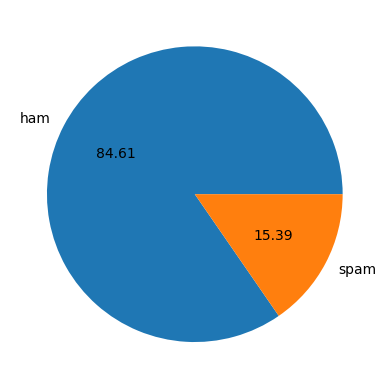

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5726.000000,5726.000000,5726.000000
mean,82.460007,19.114216,2.016766
std,59.143633,13.460934,1.488611
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,16.000000,2.000000
75%,126.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4845.000000,4845.000000,4845.000000
mean,72.023529,17.492054,1.830753
std,57.266197,13.749521,1.402429
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,881.000000,881.000000,881.000000
mean,139.854711,28.035187,3.039728
std,28.414773,6.634441,1.533567
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

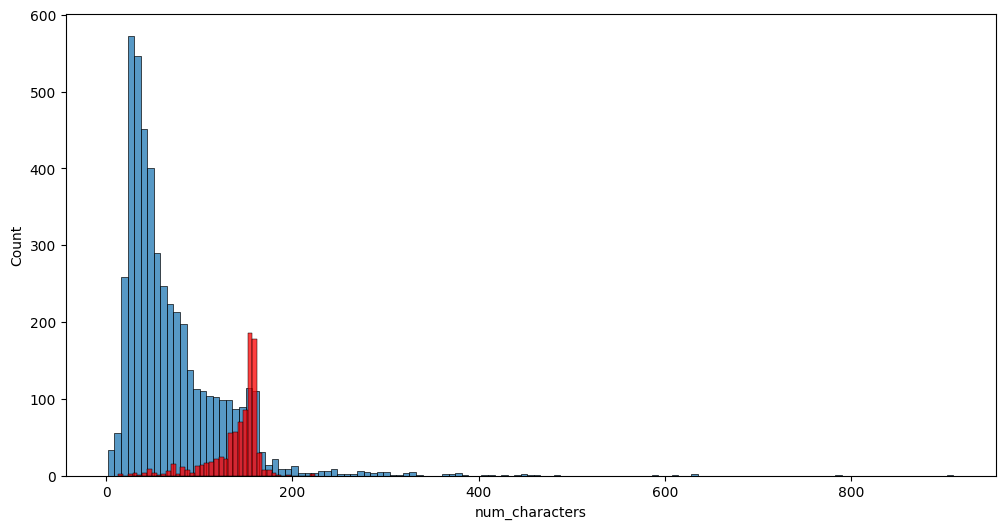

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

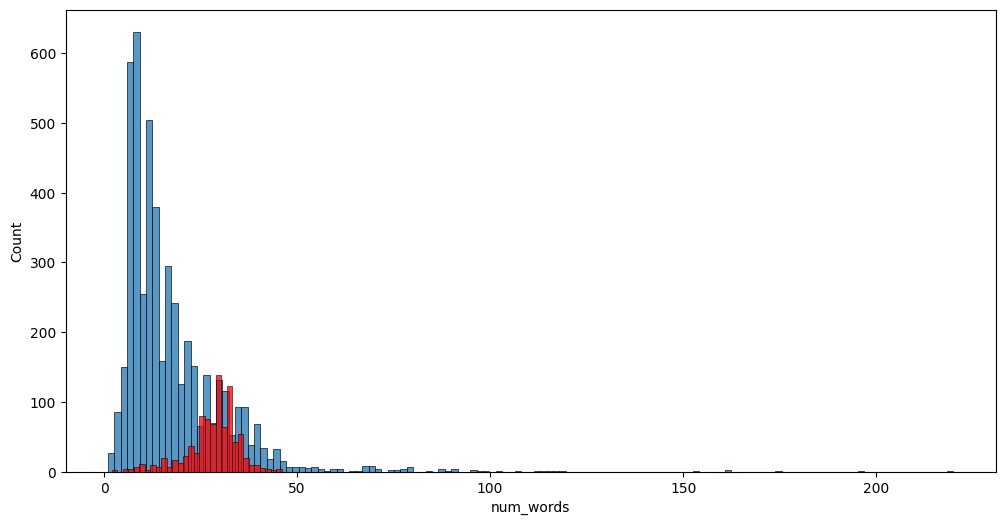

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

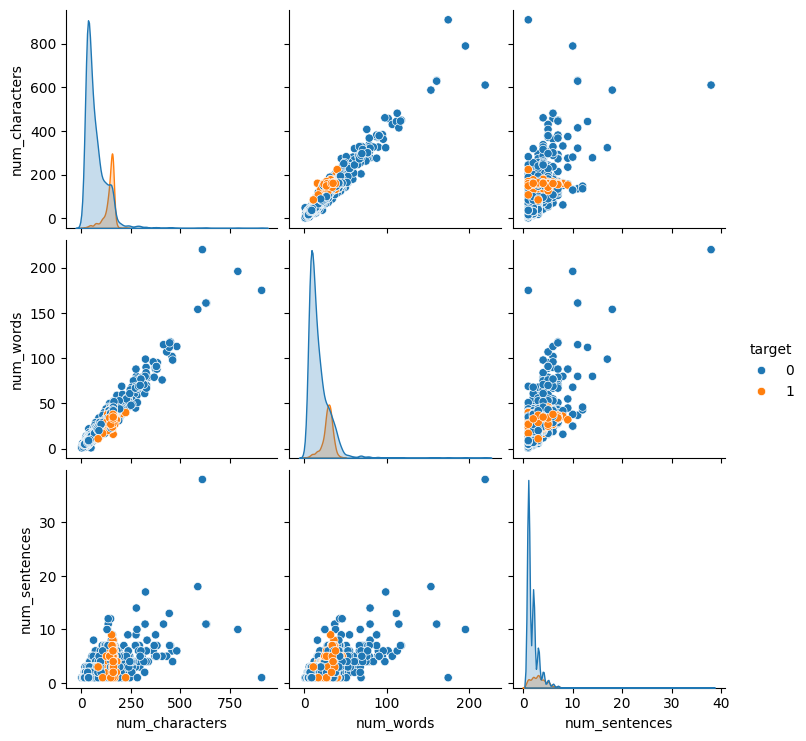

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

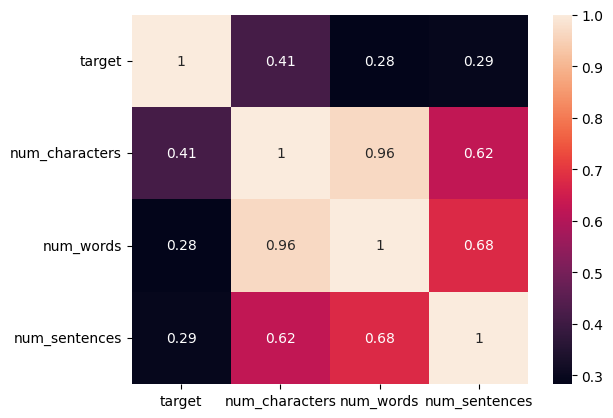

In [37]:
x=df.drop(columns=['text'])
sns.heatmap(x.corr(),annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [38]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

### For Downloading nltk stopwords

In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight ok cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

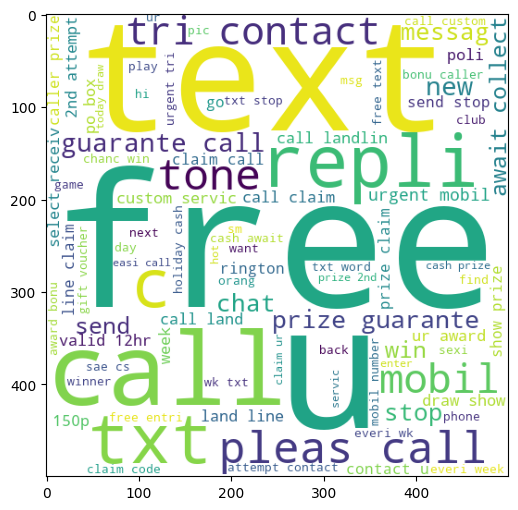

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

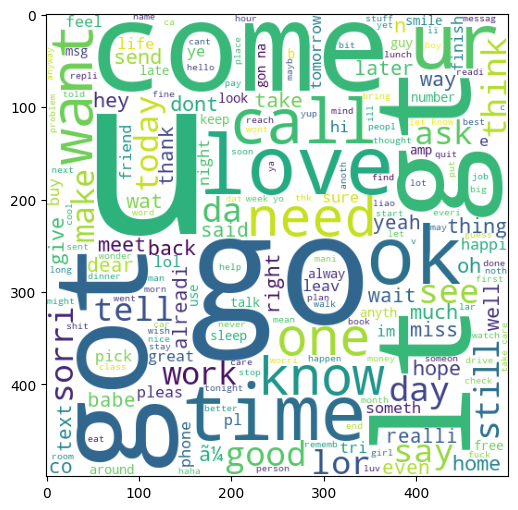

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [52]:
len(spam_corpus)

13469

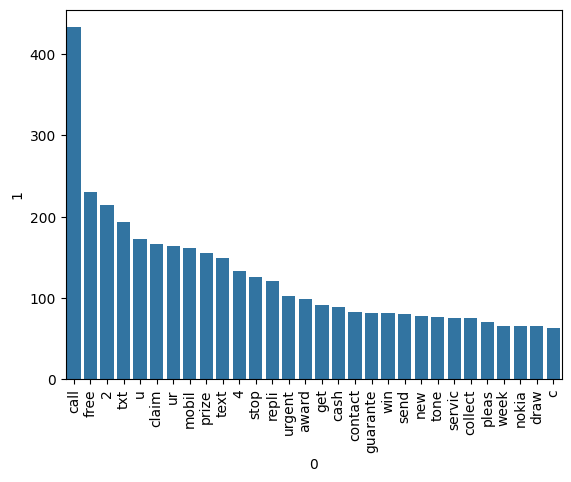

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

39112

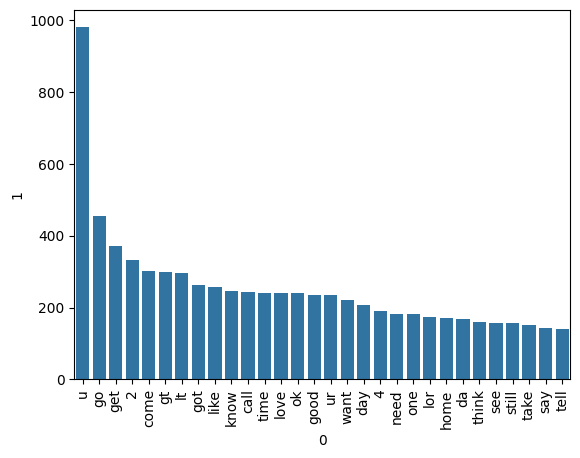

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

TF_IDF Vectorizaton

In [58]:
from model import TFIDFVectorizer

In [59]:
tfidf_vectorizer = TFIDFVectorizer(max_features=10000)

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=3000)
tfidf_matrix = tfidf_vectorizer.fit(df['transformed_text'])
X = tfidf_vectorizer.transform(df['transformed_text'])
X = selector.fit_transform(X, df['target'])

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(5726, 3000)

In [64]:
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Multinomial Naive Bayes From Scratch

In [68]:
from model import MultinomialNB1

In [69]:
mnb = MultinomialNB1()

In [70]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9799301919720768
[[938  19]
 [  4 185]]
0.9068627450980392


Multinomial Naive Bayes from libary

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
mnb1 =MultinomialNB()
mnb1.fit(X_train, y_train)
y_pred1 = mnb1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9799301919720768
[[938  19]
 [  4 185]]
0.9068627450980392


In [73]:
# tfidf --> MNB

KNN Algorithm from Scratch

In [74]:
from model import KNN

In [75]:
knn = KNN(k=3)

In [76]:
from collections import Counter

In [77]:
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred2 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9109947643979057
[[957   0]
 [102  87]]
1.0


Logistic Regression Algorithm from Scratch

In [78]:
from model import LogisticRegression1

In [79]:
lrt = LogisticRegression1()
lrt.fit(X_train, y_train)

# Predict on the testing set
y_pred3 = (lrt.predict(X_test)> 0.5).astype(int)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/model.py:118: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0.9886561954624782
[[955   2]
 [ 11 178]]
0.9888888888888889


Logistic Regression from Libary

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lrt1 = LogisticRegression(solver='liblinear', penalty='l1')
lrt1.fit(X_train, y_train)

# Predict on the testing set
y_pred31 = lrt1.predict(X_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

0.9834205933682374
[[956   1]
 [ 18 171]]
0.9941860465116279


DecisionTree Algorithm From scratch

In [82]:
from model import DecisionTree

In [83]:
dt1 = DecisionTree(max_depth=5)
dt1.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = dt1.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9144851657940664
[[951   6]
 [ 92  97]]
0.941747572815534


SVM algorithm from libary

In [84]:

from sklearn.svm import SVC

In [85]:
svm = SVC(kernel='sigmoid', gamma=1.0)
svm.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9179755671902269
[[915  42]
 [ 52 137]]
0.7653631284916201


## TF-IDF and Model form library

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
Z = tfidf.fit_transform(df['transformed_text']).toarray()
Z.shape
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,test_size=0.2,random_state=2)


In [87]:
from sklearn.naive_bayes import MultinomialNB
mnb2 =MultinomialNB()
mnb2.fit(Z_train, y_train)
y_pred1 = mnb2.predict(Z_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9755671902268761
[[956   1]
 [ 27 162]]
0.9938650306748467


In [88]:
from sklearn.linear_model import LogisticRegression
lrt2=LogisticRegression()
lrt2.fit(Z_train, y_train)

# Predict on the testing set
y_pred31 = lrt2.predict(Z_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

0.9607329842931938
[[954   3]
 [ 42 147]]
0.98


## Binding algorithms in single object for comparison

In [89]:
clfs = {
    'SVC' : svm,
    'KN' : knn, 
    'NB': mnb, 
    'DT': dt1, 
    'LR': lrt1, 
    
}

In [90]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9179755671902269
Precision -  0.7653631284916201
For  KN
Accuracy -  0.9109947643979057
Precision -  1.0
For  NB
Accuracy -  0.9799301919720768
Precision -  0.9068627450980392
For  DT
Accuracy -  0.9144851657940664
Precision -  0.941747572815534
For  LR
Accuracy -  0.9834205933682374
Precision -  0.9941860465116279


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [93]:
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.983421,0.994186
2,NB,0.979930,0.906863
0,SVC,0.917976,0.765363
3,DT,0.914485,0.941748
1,KN,0.910995,1.000000


In [94]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,LR,Accuracy,0.983421
1,NB,Accuracy,0.979930
2,SVC,Accuracy,0.917976
3,DT,Accuracy,0.914485
4,KN,Accuracy,0.910995
5,LR,Precision,0.994186
6,NB,Precision,0.906863
7,SVC,Precision,0.765363
8,DT,Precision,0.941748
9,KN,Precision,1.000000


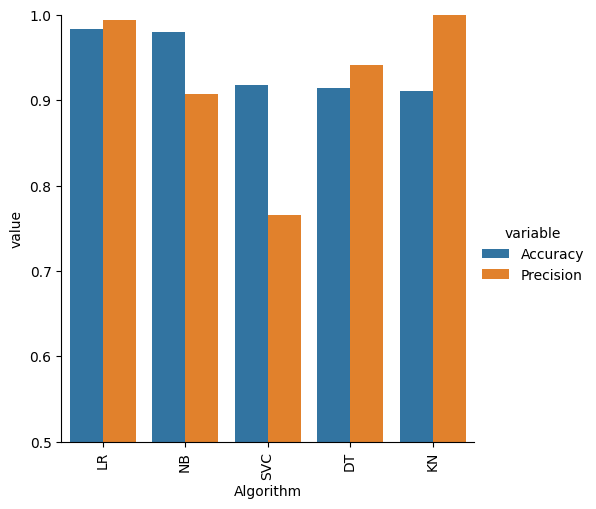

In [95]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Generating the pkl file of Vectorizer, TF-IDF, Logistic regresession and Naive Bayes model

In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('model.pkl','wb'))
pickle.dump(lrt2,open('model1.pkl','wb'))

In [97]:
input_sms=transform_text("Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16")
print(input_sms)
vector_input = tfidf.transform([input_sms])

congratul ur award 500 cd voucher 125gift guarante free entri 2 100 wkli draw txt music 87066 tnc


In [98]:
result = mnb2.predict(vector_input)[0]
print(result)

1
